In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv(r'C:\Users\marya\Downloads\insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- Q1. Do smokers have higher insurance charges than non-smokers?
Null Hypothesis - There is no significant difference between insurance charges of smokers and non-smokers.(smokers and non smokers have the same insurance charges

Alternative Hypothesis - There is significant difference between insurance charges of smokers and non-smokers.

Select the correct test : Independent 2-sample T-test

In [41]:
sample = df.sample(n=100,random_state=42)
smoker_charge = sample.loc[ sample['smoker']=='yes',"charges"]
non_smoker_charge = sample.loc[ sample['smoker']=='no',"charges"]


For Smokers (n=22): Mean=32997.31
For non-smokers (n=78): Mean=8394.54


Test the assumptions of your selected test.
Independent T-Test Assumptions:

No significant outliers
Normality 
Equal Variance 
Testing for Outliers

In [42]:
#Testing for Outliers
zscores_f = stats.zscore(smoker_charge)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

0

In [43]:
#Testing for Outliers
zscores_f = stats.zscore(non_smoker_charge)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

2

There are outliers

In [53]:
#Remove outliers
non_smoker_charge = non_smoker_charge[(np.abs(stats.zscore(non_smoker_charge)) < 3)]

In [54]:
#ReTesting for Outliers
zscores_f = stats.zscore(non_smoker_charge)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

0

There are no outliers

In [59]:
#Test of Normalities
result_smoker = stats.normaltest(smoker_charge)
print(result_smoker)
result_nonsmoker = stats.normaltest(non_smoker_charge)
print(result_nonsmoker)

NormaltestResult(statistic=8.481188655372003, pvalue=0.014399031556451041)
NormaltestResult(statistic=4.011538559343466, pvalue=0.1345567441026122)


result_nonsmoker = stats.normaltest(non_smoker_charge)
result_nonsmoker. Since sample size is greater than 15 proceeded to the next assumption

In [12]:
#Testing for Equal Variance with Levene's test
result = stats.levene(smoker_charge, non_smoker_charge)
result

LeveneResult(statistic=28.506495620059756, pvalue=6.24829133463234e-07)

Since our p-value was <.05 we reject the null hypothesis that the samples come from populations with equal variances. We have not met the assumption of homogeneity of variances. Thus  we  will run the Welch's T-Test, to account for unequal variance.

In [57]:
result1 = stats.ttest_ind(smoker_charge, non_smoker_charge)
print(result1)
result1.pvalue < .05

Ttest_indResult(statistic=17.40885366485481, pvalue=5.145268224638272e-31)


True

The Welch's T-Test return a p-value < .05 thus we reject the null hypothesis and support the alternative hypothesis that there is a significant difference between insurance charges of smokers and non-smokers.

CONCLUSION:
there is a significant difference between insurance charges of smokers and non-smokers. As shown in the graph below: Smokers are charged higher than non-smokers

For Smokers (n=22): Mean=32997.31
For non-smokers (n=73): Mean=7177.87


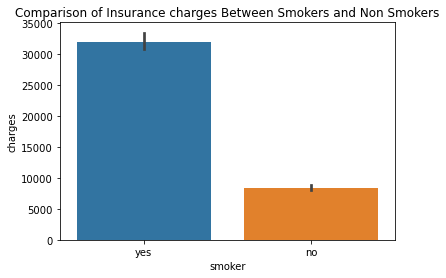

In [58]:
ax = sns.barplot(data=df, x='smoker',y='charges',)
ax.set_title("Comparison of Insurance charges Between Smokers and Non Smokers");

#Mean of the insurance charges for smokers and non-smokers
print(f"For Smokers (n={len(smoker_charge)}): Mean={np.mean(smoker_charge):.2f}")
print(f"For non-smokers (n={len(non_smoker_charge)}): Mean={np.mean(non_smoker_charge):.2f}")

Q2. Are men more likely to smoke than women?
Null Hypothesis - There is no relationship between gender and likelihood to smoke

Alternative Hypothesis - There is a relationship between gender and smoking  

- Select the correct test: Chi-square test

- Test the assumptions of your selected test: 
- Show a supporting visualization that helps display the result

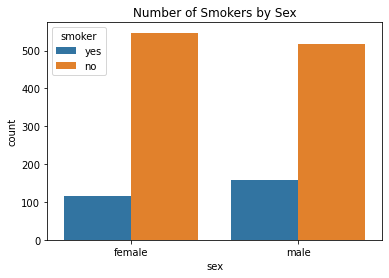

In [13]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

In [14]:
comparison = pd.crosstab(df['sex'], df['smoker'])
comparison

smoker,no,yes
sex,,
female,547,115
male,517,159


In [15]:
result = stats.chi2_contingency(comparison)
chi2, p, deg_free, expected_vals = result

In [16]:
print(p)
p<.05

0.006548143503580696


True

Since our p < .05, we reject the null hypothesis that there is no relationship between gender and likelihood of smoking.Hence, accept the alternate hypothesis and conclude that there is a relationship between gender and smoking.{men are more likely to smoke than women

- Q3. Do different regions have different charges, on average?
- Null Hypothesis - There is no significant difference between the amount of insurance charge in different regions.(Charges are the same irrespective of the region)

- Alternate Hypothesis - There is a significant difference between the amount of insurance charge in different regions.

- Select the correct test: ANOVA test



- Show a supporting visualization that helps display the result


- Test the assumptions of your selected test: Normality, Equal variance, No significant outliers

In [62]:
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [66]:
#Test for Outliers
zscores_f2 = stats.zscore(data)
outliers_f2 = abs(zscores_f2)>3
np.sum(outliers_f2)

4

In [69]:
data = data[(np.abs(stats.zscore(data)) < 3)]

[8       True
 10      True
 16      True
 17      True
 20      True
         ... 
 1321    True
 1325    True
 1326    True
 1328    True
 1334    True
 Name: charges, Length: 320, dtype: bool]

In [70]:
#ReTesting for Outliers
zscores_f3 = stats.zscore(data)
outliers_f3 = abs(zscores_f3)>3
np.sum(outliers_f)

0

In [63]:
#Test for Normality
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


They do not have a normal distribution

In [71]:
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


Test for Equal Variance: using Levienne Test

In [72]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

Since the p<0.05 : we reject the null hypothesis also indicating the groups have unequal variance. 

In [80]:
#ANOVA Hypothesis Test
results = stats.f_oneway( *groups.values())
results

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

p<0.05 indicating There is no significant difference between the regions and charges

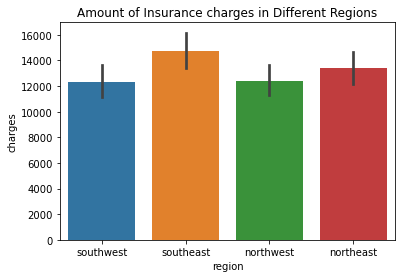

In [17]:
ax = sns.barplot(data=df, x='region',y='charges',)
ax.set_title("Amount of Insurance charges in Different Regions");

In [84]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
reg=df['region']
char=df['charges']
tukeys_results = pairwise_tukeyhsd(char, reg)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


In [94]:
df.groupby(['region']).mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


CONCLUSION: 
Most regions show there is no significance difference between the different regions and charges.
Only exception : Southeast and southwest where there is a significant difference in charges